In [52]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from tools import timeit
from matplotlib.animation import FuncAnimation

In [5]:
Z = np.array([[0,0,0,0,0,0],
             [0,0,0,1,0,0],
             [0,1,0,1,0,0],
             [0,0,1,1,0,0],
             [0,0,0,0,0,0],
             [0,0,0,0,0,0]])

In [6]:
N = np.zeros(Z.shape, dtype=int)
print(N)
N[1:-1,1:-1] += (Z[:-2,:-2] + Z[:-2,1:-1] + Z[:-2,2:]  +
                 Z[1:-1,:-2]+             + Z[1:-1,2:] +
                 Z[2:,:-2]  + Z[2:,1:-1]  + Z[2:,2:])
print(N)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
[[0 0 0 0 0 0]
 [0 1 3 1 2 0]
 [0 1 5 3 3 0]
 [0 2 3 2 2 0]
 [0 1 2 2 1 0]
 [0 0 0 0 0 0]]


In [11]:
N_ = N.flatten()
Z_ = Z.flatten()

R1 = np.argwhere((Z_ == 1) & (N_ < 2))
R2 = np.argwhere((Z_ == 1) & (N_ > 3))
R3 = np.argwhere((Z_ == 1) & ((N_ == 2) | (N_ == 3)))
R4 = np.argwhere((Z_ == 0) & (N_ == 3))
                 
Z_[R1] = 0
Z_[R2] = 0
Z_[R3] = Z_[R3]
Z_[R4] = 1

Z[0,:] = Z[-1,:] = Z[:,0] = Z[:,-1] = 0

In [55]:
def update(*args):
    global Z, M

    N = (Z[0:-2, 0:-2] + Z[0:-2, 1:-1] + Z[0:-2, 2:] +
         Z[1:-1, 0:-2]                 + Z[1:-1, 2:] +
         Z[2:  , 0:-2] + Z[2:  , 1:-1] + Z[2:  , 2:])
    birth = (N == 3) & (Z[1:-1, 1:-1] == 0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1, 1:-1] == 1)
    Z[...] = 0
    Z[1:-1, 1:-1][birth | survive] = 1

    # Show past activities
    M[M>0.25] = 0.25
    M *= 0.995
    M[Z==1] = 1
    # Direct activity
    # M[...] = Z
    im.set_data(M)


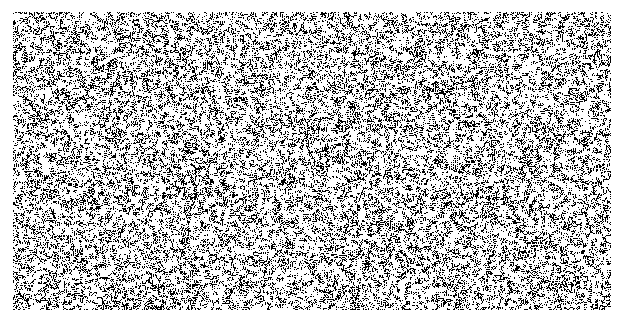

In [56]:
Z = np.random.randint(0, 2, (300, 600))
M = np.zeros(Z.shape)

size = np.array(Z.shape)
dpi = 80.0
figsize = size[1]/float(dpi), size[0]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False)
im = plt.imshow(M, interpolation='nearest', cmap=plt.cm.gray_r, vmin=0, vmax=1)
plt.xticks([]), plt.yticks([])

animation = FuncAnimation(fig, update, interval=10, frames=2000)
# animation.save('game-of-life.mp4', fps=40, dpi=80, bitrate=-1, codec="libx264",
#                extra_args=['-pix_fmt', 'yuv420p'],
#                metadata={'artist':'Nicolas P. Rougier'})
plt.show()